In [1]:
#%matplotlib inline
from circus.shared.parser import CircusParser
from circus.shared.files import load_data
import matplotlib.pyplot as plt
from pathlib import Path
import os
import numpy as np



In [4]:
animal = 'Li'
task = 'T3g'
date = '062718'
filename = animal+'_'+task+'_'+date+'_Results'
datPath=Path('/Users/alexgonzalez/Google Drive/PostDoc/Data/',task,animal,filename)
savePath=Path(datPath,'plots')
savePath.mkdir(parents=True, exist_ok=True) 

cwd = datPath.cwd()
os.chdir(str(datPath))

for tt in np.arange(1,17):
    try:
        params    = CircusParser(str(datPath)+'/tt_'+str(tt)+'.npy')
        N_e       = params.getint('data', 'N_e') # The number of channels
        N_t       = params.getint('detection', 'N_t') # The temporal width of the template
        templates = load_data(params, 'templates') # To load the templates
        results = load_data(params, 'results') # To load the templates
        templates = templates.toarray()
        nTemps = len(results['spiketimes'])
        print('Tetrode {} has {} templates'.format(tt,nTemps))
        time = np.arange(97)/32
        for i in np.arange(nTemps):
            nSpikes = len(results['spiketimes']['temp_'+str(i)])
            fig, ax = plt.subplots(figsize=(4,3))
            ax.plot(time,templates[:, i].reshape(N_e, 97).T,alpha=0.7)
            ax.set_xlabel('time[ms]')
            ax.set_ylabel('amp[z]')
            ax.grid()
            ax.set_title('TT-{}_temp-{}_nSpikes-{}'.format(tt,i,nSpikes))
            ax.legend(['c1','c2','c3','c4'],bbox_to_anchor=(1, 0.2, 0.25, 0.5))
            fig.savefig(str(savePath / 'TT{}_temp{}.pdf'.format(tt,i)),bbox_inches='tight')
    except:
        print('Could not load template for tetrode {}'.format(tt))
        print ("error", sys.exc_info()[0],sys.exc_info()[1],sys.exc_info()[2].tb_lineno)


/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_062718_Results/tt_1/tt_1.templates.hdf5 True
<HDF5 file "tt_1.templates.hdf5" (mode r)>
Tetrode 1 has 11 templates
/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_062718_Results/tt_2/tt_2.templates.hdf5 True
<HDF5 file "tt_2.templates.hdf5" (mode r)>
Tetrode 2 has 7 templates
/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_062718_Results/tt_3/tt_3.templates.hdf5 True
<HDF5 file "tt_3.templates.hdf5" (mode r)>
Tetrode 3 has 26 templates
/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_062718_Results/tt_4/tt_4.templates.hdf5 True
<HDF5 file "tt_4.templates.hdf5" (mode r)>
Tetrode 4 has 8 templates
/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_062718_Results/tt_5/tt_5.templates.hdf5 True
<HDF5 file "tt_5.templates.hdf5" (mode r)>
Tetrode 5 has 11 templates
/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_062718_Results/tt_6/tt_6.templates.hdf5 True
<HDF5 file "tt_6.templ

In [2]:
templates.shape

NameError: name 'templates' is not defined

In [4]:
time = np.arange(97)/32
for i in np.arange(int(nTemps/2)):
    fig, ax = plt.subplots(figsize=(4,3))
    ax.plot(time,templates[:, i].reshape(N_e, 97).T,alpha=0.7)
    ax.set_xlabel('time[ms]')
    ax.set_ylabel('amp[z]')
    ax.grid()
    ax.set_title('TT'+str(tt)+'_temp'+str(i))
    ax.legend(['c1','c2','c3','c4'],bbox_to_anchor=(1, 0.2, 0.25, 0.5))
    fig.savefig(str(datPath)+ '/tt_'+str(tt)+'/plots/TT'+str(tt)+'_temp'+str(i)+'.pdf',bbox_inches='tight')

True

In [ ]:
time = np.arange(97)/32
for i in np.arange(int(nTemps/2)):
    fig, ax = plt.subplots(figsize=(4,3))
    ax.plot(time,templates[:, i].reshape(N_e, 97).T,alpha=0.7)
    ax.set_xlabel('time[ms]')
    ax.set_ylabel('amp[z]')
    ax.grid()
    ax.set_title('TT'+str(ttID)+'_temp'+str(i))
    ax.legend(['c1','c2','c3','c4'],bbox_to_anchor=(1, 0.2, 0.25, 0.5))
    fig.savefig(str(datPath / 'tt_3/plots/')+'/TT'+str(ttID)+'_temp'+str(i)+'.pdf',bbox_inches='tight')

In [6]:

#GoodTemp = [0,1,2,3,5,6,8,11,12,16]
results = load_data(params, 'results') # To load the templates

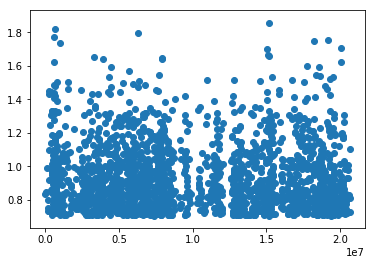

In [25]:
%matplotlib inline

plt.scatter(results['spiketimes']['temp_0'],results['amplitudes']['temp_0'][:,0])

In [41]:
tt=10
x=np.load(str(datPath / 'tt_{}.npy'.format(tt)))

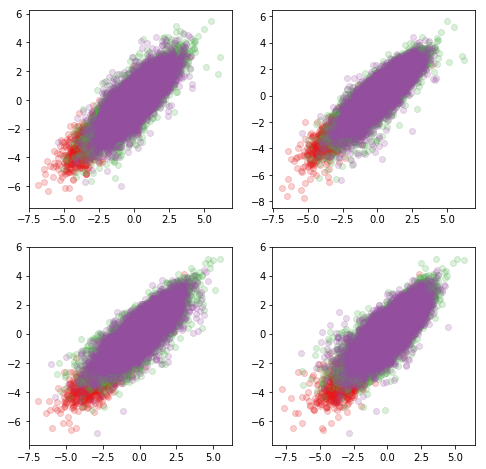

In [43]:
%matplotlib inline
cmap=plt.get_cmap('Set1')
temp=[0,2,3]
fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()
for i in temp:
    ax[0].scatter(x[results['spiketimes']['temp_'+str(i)],0],x[results['spiketimes']['temp_'+str(i)],1],color=cmap(i),alpha=0.2)
    ax[1].scatter(x[results['spiketimes']['temp_'+str(i)],0],x[results['spiketimes']['temp_'+str(i)],2],color=cmap(i),alpha=0.2)
    ax[2].scatter(x[results['spiketimes']['temp_'+str(i)],1],x[results['spiketimes']['temp_'+str(i)],3],color=cmap(i),alpha=0.2)
    ax[3].scatter(x[results['spiketimes']['temp_'+str(i)],2],x[results['spiketimes']['temp_'+str(i)],3],color=cmap(i),alpha=0.2)
    
#plt.scatter(x[t11,0],x[t11,1])


In [84]:
tt=3
params    = CircusParser(str(datPath)+'/tt_'+str(tt)+'.npy')
c = load_data(params,'clusters')

In [85]:
#plt.scatter(c['data_0'][c['clusters_0']==0],c['data_1'][c['clusters_0']==0])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2934 but corresponding boolean dimension is 15202

In [62]:
len(c['data_0']),len(c['data_1']),len(c['data_2']),len(c['data_3'])

(5813, 15292, 4953, 6331)

In [89]:
templates

array([[ 5.91217995e-01, -4.84480768e-01,  4.86417720e-03, ...,
         2.56426651e-02,  0.00000000e+00, -1.08313095e-02],
       [ 5.11254430e-01, -5.21402955e-01, -1.40217513e-01, ...,
         3.02066803e-02,  0.00000000e+00, -1.44089051e-02],
       [ 5.80689907e-01, -5.90659618e-01,  6.66542351e-02, ...,
         1.40083330e-02,  0.00000000e+00, -1.10677220e-02],
       ...,
       [-4.91394103e-02, -2.07553487e-02,  1.17241502e-01, ...,
         0.00000000e+00, -4.14689369e-02,  0.00000000e+00],
       [-9.33836587e-03, -6.82899263e-05,  1.44902676e-01, ...,
         0.00000000e+00, -3.19985906e-03,  0.00000000e+00],
       [ 6.17169254e-02, -1.38957739e-01,  1.30772114e-01, ...,
         0.00000000e+00,  4.26055603e-02,  0.00000000e+00]], dtype=float32)

(array([ 126., 3162., 2905.,    0.,    0.,    0.,    0.,    0.,   63.,
          48.,    0.,    0.,    0.,   27.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19]),
 <a list of 20 Patch objects>)

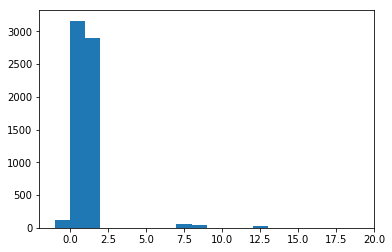

In [68]:
plt.hist(c['clusters_3'],np.arange(-1,20))

In [22]:
x[results['spiketimes']['temp_'+str(i)],0],x[results['spiketimes']['temp_'+str(i)],1],x[results['spiketimes']['temp_'+str(i)],2]

(array([ 0.91793555,  2.2381365 , -1.2354767 , ...,  0.2804214 ,
         0.44600263,  0.23892018], dtype=float32),
 array([-4.9140253, -6.11924  , -4.328889 , ..., -4.8534966, -4.637722 ,
        -6.501054 ], dtype=float32),
 array([ 0.6779274,  2.6804888, -1.2443842, ...,  1.72809  , -1.1487918,
         0.6539719], dtype=float32))

In [51]:
c['data_1']

array([[  7.3902893 ,   7.6062164 ,   5.2144103 , ...,   2.2230363 ,
          0.9178992 ,   0.64835304],
       [ -2.812853  ,   1.6541634 ,   2.9172564 , ...,  -0.3732563 ,
         -0.78093266,  -1.6953508 ],
       [  2.1957636 ,   4.5062113 ,   2.9109044 , ...,  -0.9833206 ,
          0.17442988,  -4.0504026 ],
       ...,
       [ -0.14656371,  -8.253787  ,   1.9595841 , ..., -16.579798  ,
         -1.778287  ,  -0.14665864],
       [  1.3758099 , -22.040705  ,  -1.1541904 , ...,  -1.6122131 ,
          2.1943128 ,   0.03380119],
       [  0.3509908 ,  -2.7314904 ,   1.0474253 , ...,   1.215201  ,
          0.9808404 ,   0.71137506]], dtype=float32)

In [40]:
templates

array([[ 5.91217995e-01, -4.84480768e-01,  4.86417720e-03, ...,
         2.56426651e-02,  0.00000000e+00, -1.08313095e-02],
       [ 5.11254430e-01, -5.21402955e-01, -1.40217513e-01, ...,
         3.02066803e-02,  0.00000000e+00, -1.44089051e-02],
       [ 5.80689907e-01, -5.90659618e-01,  6.66542351e-02, ...,
         1.40083330e-02,  0.00000000e+00, -1.10677220e-02],
       ...,
       [-4.91394103e-02, -2.07553487e-02,  1.17241502e-01, ...,
         0.00000000e+00, -4.14689369e-02,  0.00000000e+00],
       [-9.33836587e-03, -6.82899263e-05,  1.44902676e-01, ...,
         0.00000000e+00, -3.19985906e-03,  0.00000000e+00],
       [ 6.17169254e-02, -1.38957739e-01,  1.30772114e-01, ...,
         0.00000000e+00,  4.26055603e-02,  0.00000000e+00]], dtype=float32)